# Importing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("tips.csv")

# Understanding the data

In [4]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated(keep=False)]

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [8]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [9]:
df["tip_pct"] = df["tip"] / df["total_bill"] * 100
df.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.070000,13.347500,17.795000,24.127500,50.810000
tip,244.0,2.998279,1.383638,1.000000,2.000000,2.900000,3.562500,10.000000
size,244.0,2.569672,0.951100,1.000000,2.000000,2.000000,3.000000,6.000000
tip_pct,244.0,16.080258,6.107220,3.563814,12.912736,15.476977,19.147549,71.034483


In [11]:
df.describe(include='object').T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


In [12]:
print (df["sex"].unique())
print (df["smoker"].unique())
print (df["day"].unique())
print (df["time"].unique())

['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


# Visualization

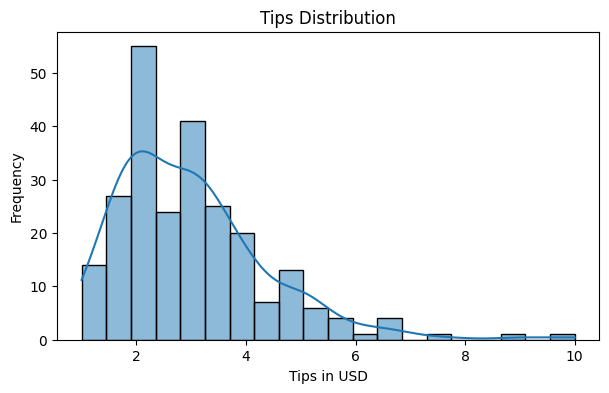

In [13]:
plt.figure(figsize=(7, 4))
sns.histplot(df["tip"], kde=True, bins=20)
plt.title("Tips Distribution")
plt.xlabel("Tips in USD")
plt.ylabel("Frequency")
plt.show()

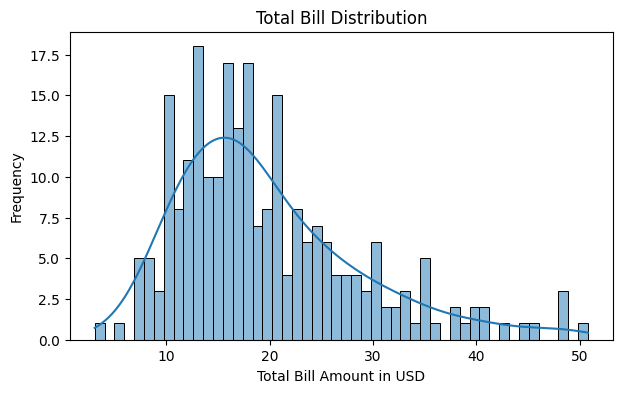

In [14]:
plt.figure(figsize=(7, 4))
sns.histplot(df["total_bill"], kde=True, bins=50)
plt.title("Total Bill Distribution")
plt.xlabel("Total Bill Amount in USD")
plt.ylabel("Frequency")
plt.show()

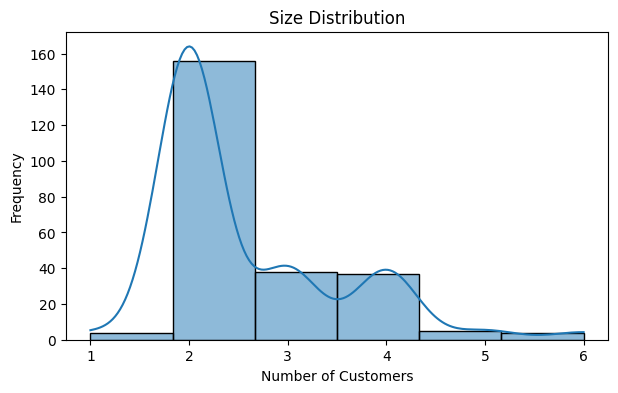

In [15]:
plt.figure(figsize=(7, 4))
sns.histplot(df["size"], kde=True, bins=6)
plt.title("Size Distribution")
plt.xlabel("Number of Customers")
plt.ylabel("Frequency")
plt.show()

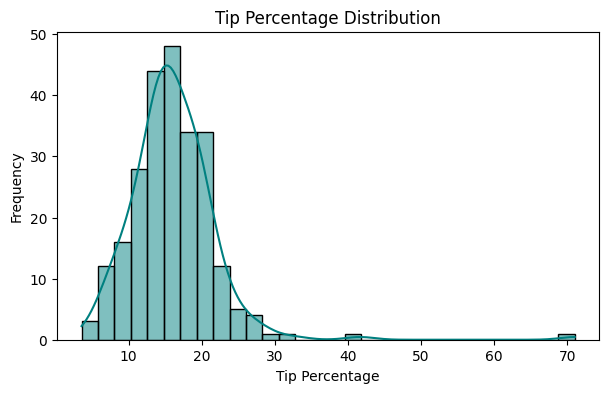

In [16]:
plt.figure(figsize=(7, 4))
sns.histplot(df["tip_pct"], kde=True, bins=30, color='teal')
plt.title("Tip Percentage Distribution")
plt.xlabel("Tip Percentage")
plt.ylabel("Frequency")
plt.show()

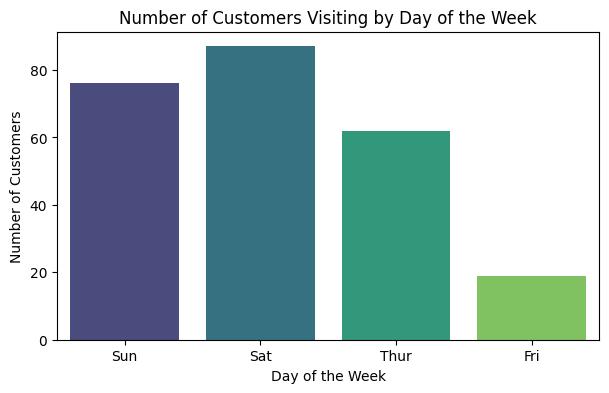

In [17]:
plt.figure(figsize=(7, 4))
sns.countplot(x='day', data=df, palette='viridis')
plt.title("Number of Customers Visiting by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Customers")
plt.show()

**Weekends are busier**

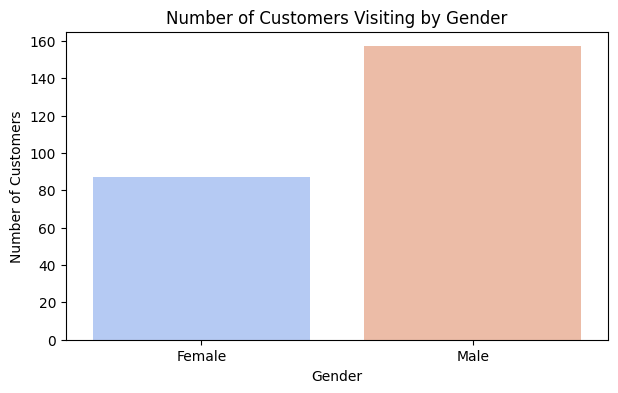

In [18]:
plt.figure(figsize=(7, 4))
sns.countplot(x='sex', data=df, palette='coolwarm')
plt.title("Number of Customers Visiting by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

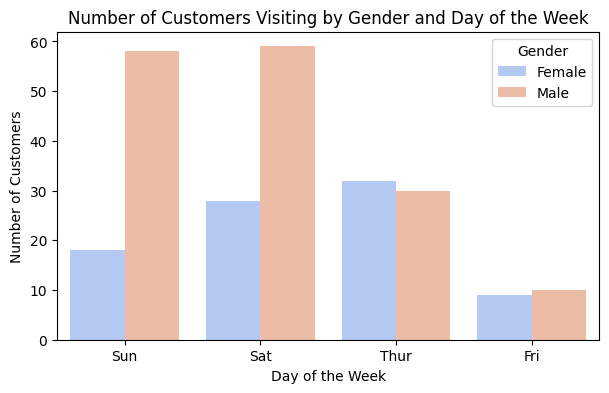

In [19]:
plt.figure(figsize=(7, 4))
sns.countplot(x='day', hue='sex', data=df, palette='coolwarm')
plt.title("Number of Customers Visiting by Gender and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Customers")
plt.legend(title='Gender')
plt.show()

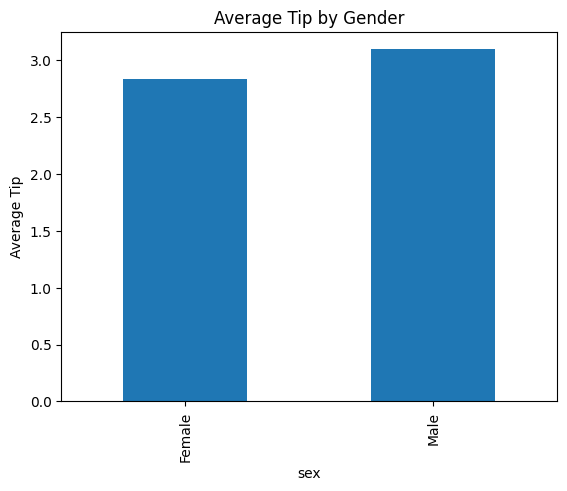

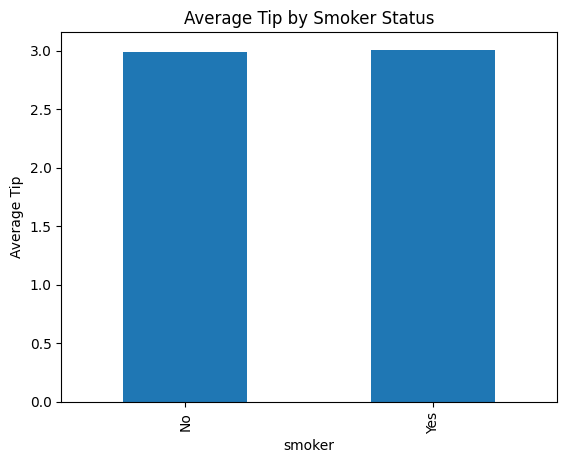

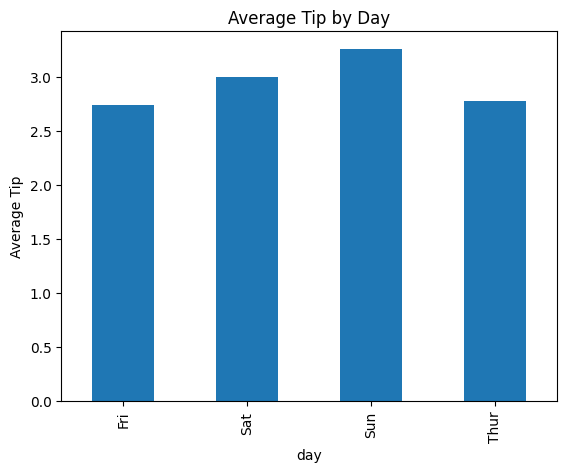

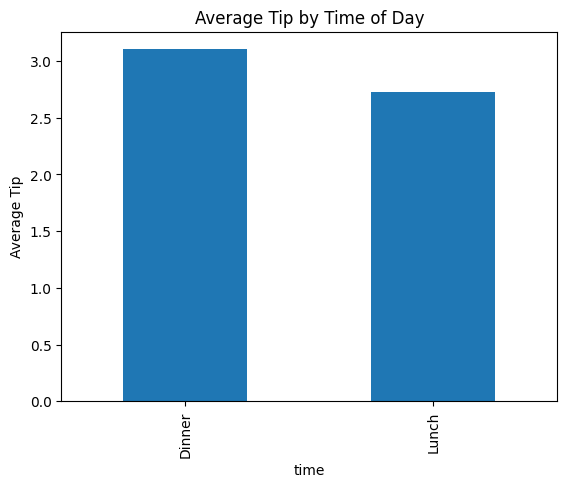

In [20]:
df.groupby('sex')['tip'].mean().plot(kind='bar', title='Average Tip by Gender', ylabel='Average Tip')
plt.show()

df.groupby('smoker')['tip'].mean().plot(kind='bar', title='Average Tip by Smoker Status', ylabel='Average Tip')
plt.show()

df.groupby('day')['tip'].mean().plot(kind='bar', title='Average Tip by Day', ylabel='Average Tip')
plt.show()

df.groupby('time')['tip'].mean().plot(kind='bar', title='Average Tip by Time of Day', ylabel='Average Tip')
plt.show()

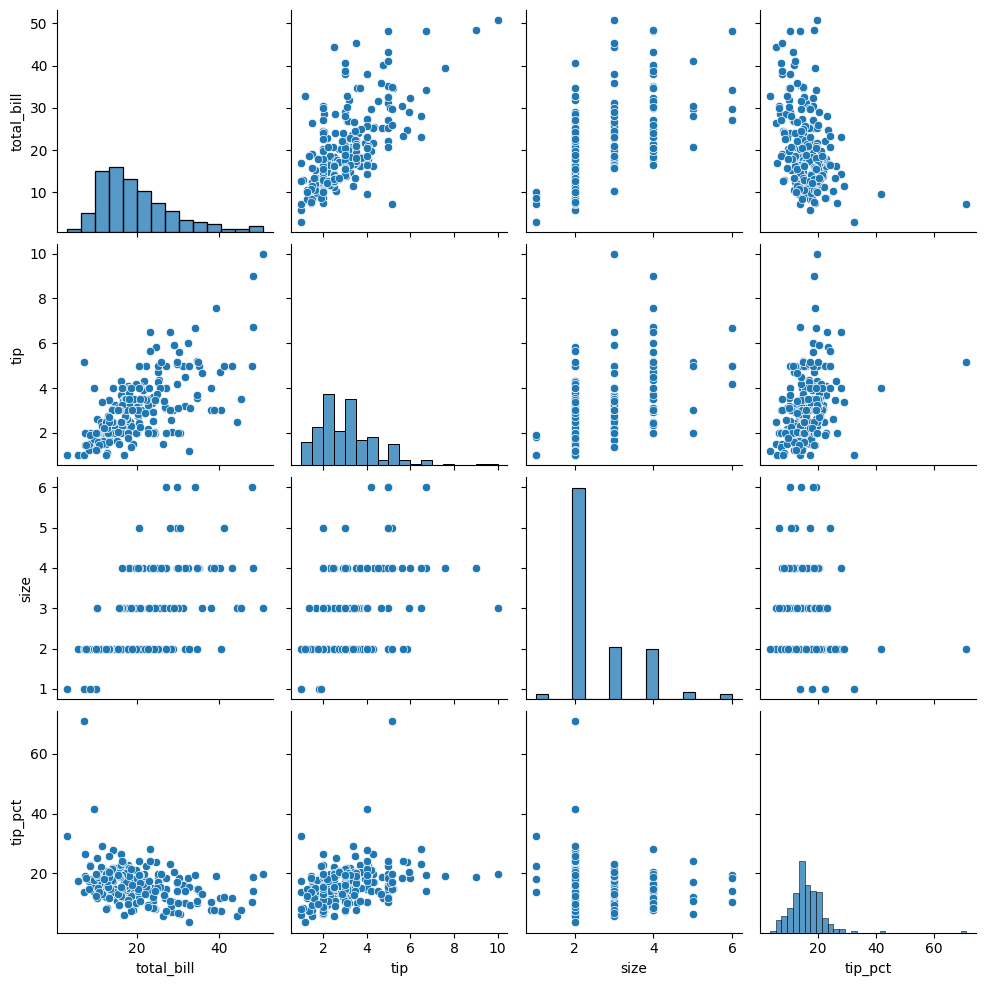

In [21]:
sns.pairplot(df)
plt.show()

* **Positive relation between total bill amount and tips received**
* **Size of customer have very weak relation to both total bill amount and tips received**

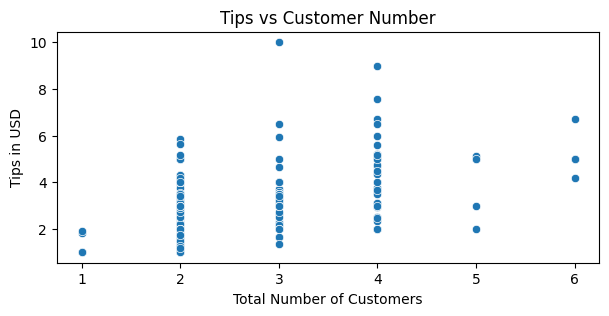

In [22]:
plt.figure(figsize=(7, 3))
sns.scatterplot(x="size", y="tip", data=df)
plt.title("Tips vs Customer Number")
plt.xlabel("Total Number of Customers")
plt.ylabel("Tips in USD")
plt.show()

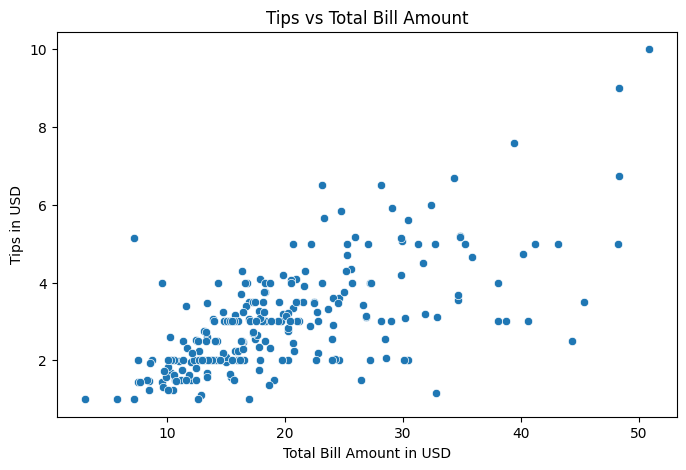

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="total_bill", y="tip", data=df)
plt.title("Tips vs Total Bill Amount")
plt.xlabel("Total Bill Amount in USD")
plt.ylabel("Tips in USD")
plt.show()

**Higher the total bill amount, higher the tips**

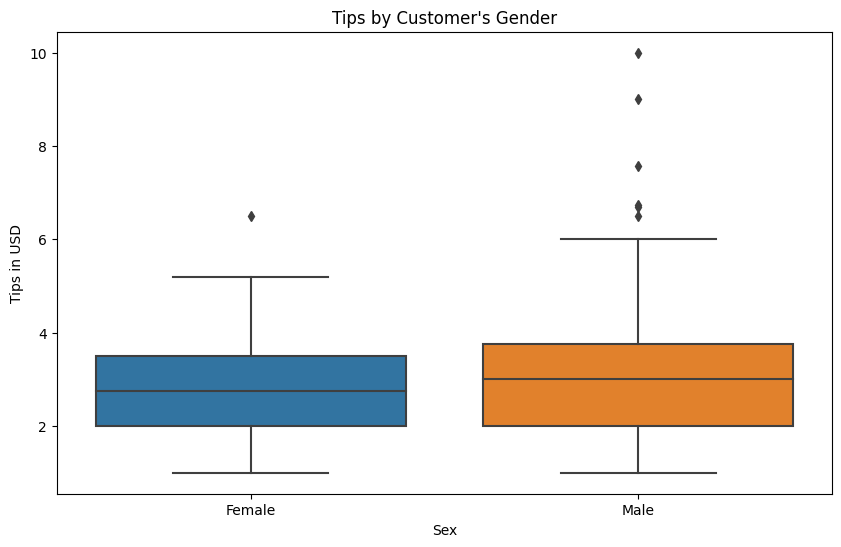

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="sex", y="tip", data=df)
plt.title("Tips by Customer's Gender")
plt.xlabel("Sex")
plt.ylabel("Tips in USD")
plt.show()

**Male tend to give slightly high tips than compared to females, and also male have higher variability in tips than females**

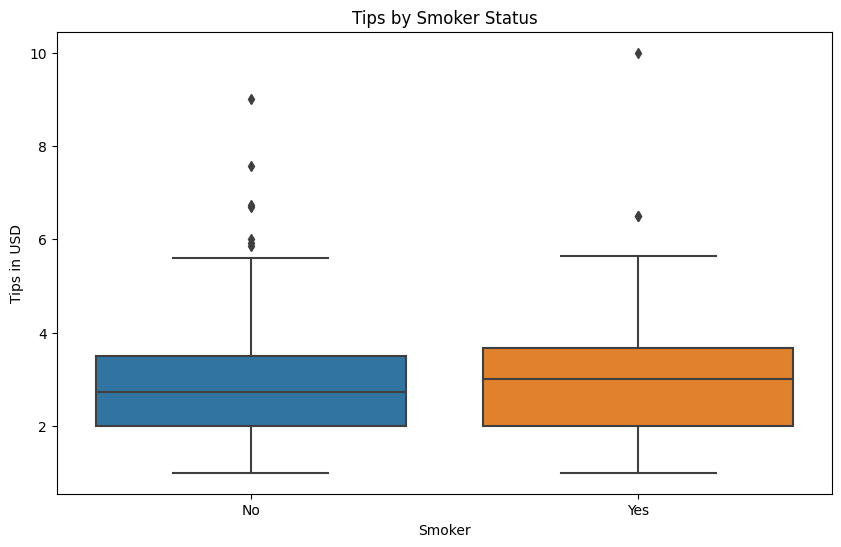

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="smoker", y="tip", data=df)
plt.title("Tips by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Tips in USD")
plt.show()

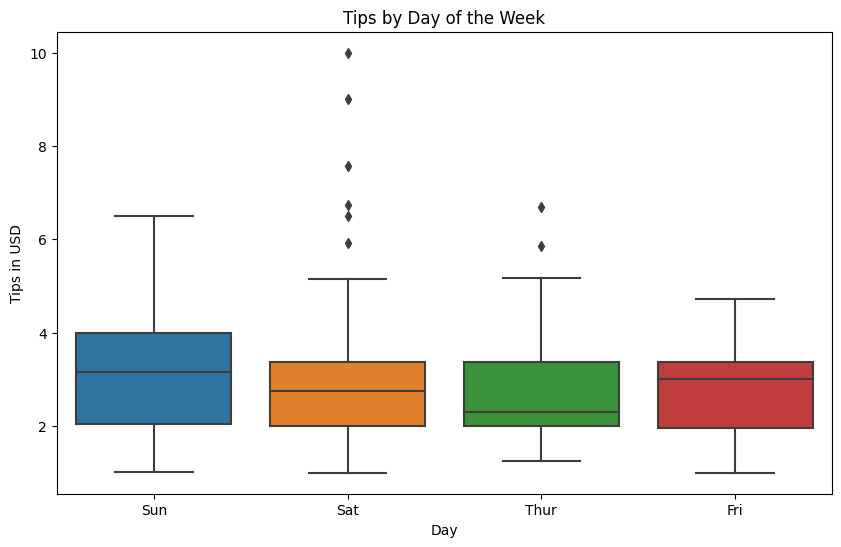

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="day", y="tip", data=df)
plt.title("Tips by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Tips in USD")
plt.show()

**Tips are generally higher on weekends (Sunday and Saturdays) compared to that on weekdays**

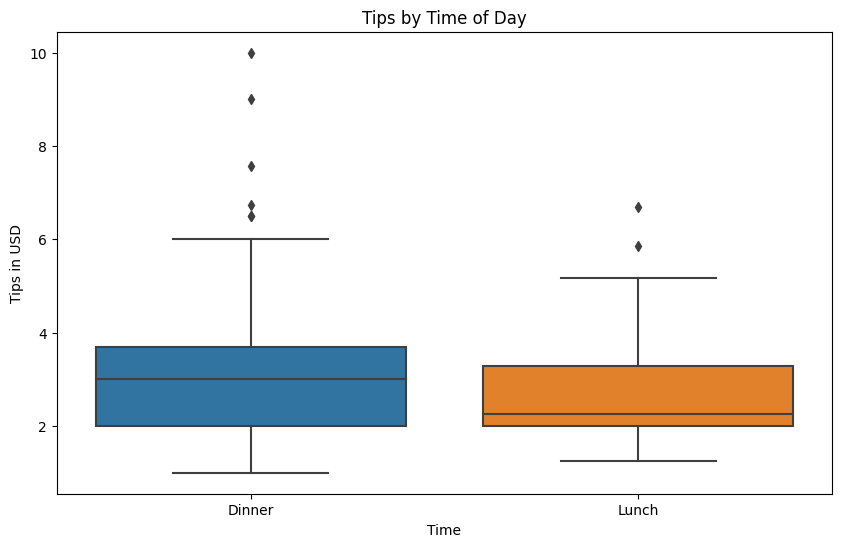

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="time", y="tip", data=df)
plt.title("Tips by Time of Day")
plt.xlabel("Time")
plt.ylabel("Tips in USD")
plt.show()

**Tips received during dinner are generally higher also having wide range compared to that during lunch time**

<Figure size 1000x600 with 0 Axes>

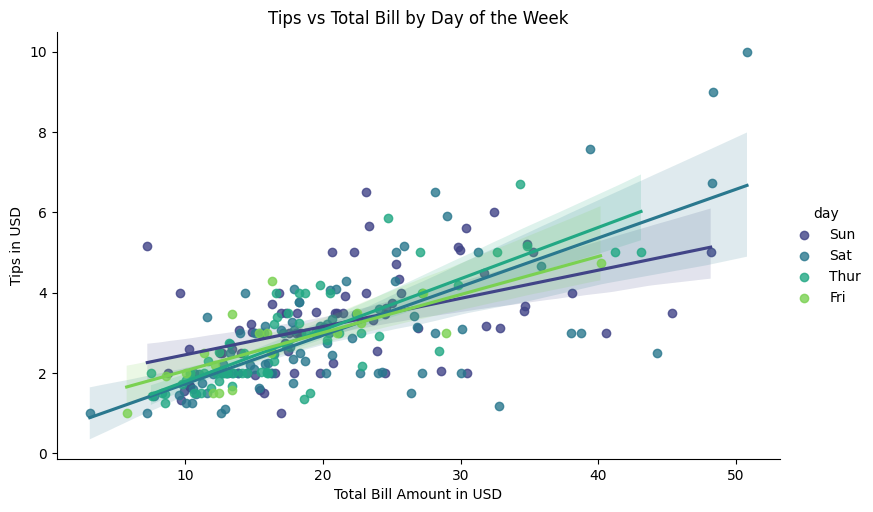

In [28]:
plt.figure(figsize=(10, 6))
sns.lmplot(x="total_bill", y="tip", hue="day", data=df, aspect=1.6, palette="viridis")
plt.title("Tips vs Total Bill by Day of the Week")
plt.xlabel("Total Bill Amount in USD")
plt.ylabel("Tips in USD")
plt.show()